# 第11章 时间序列

### 11.1 日期和时间数据类型及工具

In [1]:
from datetime import datetime

In [2]:
now=datetime.now()

In [3]:
now

datetime.datetime(2019, 7, 17, 21, 49, 42, 797165)

In [4]:
now.year,now.month,now.day

(2019, 7, 17)

In [5]:
delta=datetime(2010,9,5)-datetime(2006,7,1,11,12)

In [6]:
delta

datetime.timedelta(days=1526, seconds=46080)

In [7]:
delta.days

1526

In [8]:
delta.seconds

46080

In [9]:
from datetime import timedelta

In [10]:
start=datetime(2011,1,3)
#月和日如果是个位数，前边的0必须去掉

In [11]:
start+timedelta(12)

datetime.datetime(2011, 1, 15, 0, 0)

In [12]:
start-2*timedelta(12)

datetime.datetime(2010, 12, 10, 0, 0)

In [13]:
datetime.max

datetime.datetime(9999, 12, 31, 23, 59, 59, 999999)

In [14]:
datetime.now().year,datetime.now().hour,datetime.now().second

(2019, 21, 42)

### 字符串和datetime的相互转换

In [15]:
stamp=datetime(2011,1,3,21,32,25)

In [16]:
stamp

datetime.datetime(2011, 1, 3, 21, 32, 25)

In [17]:
str(stamp)

'2011-01-03 21:32:25'

In [18]:
stamp.strftime('%Y-%m-%d-%H-%M-%S')

'2011-01-03-21-32-25'

In [19]:
stamp.strftime('%Y%m%d%H%M%S')
#反过来如何实现？

'20110103213225'

In [20]:
value='2010-09-05'

In [21]:
value

'2010-09-05'

In [22]:
type(value)

str

In [23]:
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2010, 9, 5, 0, 0)

In [24]:
value1='201603021205'

In [25]:
datetime.strptime(value1,'%Y%m%d%H%M%S')
#将201012311321形式保存的日期转换为datetime

datetime.datetime(2016, 3, 2, 12, 0, 5)

In [26]:
v1=['201901021254','201405060806']
#将一个列表里的字符串转换成时间

In [27]:
for i in range(len(v1)):
    print(datetime.strptime(v1[i],'%Y%m%d%H%M%S'))

2019-01-02 12:05:04
2014-05-06 08:00:06


In [28]:
from dateutil.parser import parse

In [29]:
parse('2015-03-25')

datetime.datetime(2015, 3, 25, 0, 0)

In [30]:
parse('Jan 31,1982 23:31')

datetime.datetime(2019, 1, 31, 23, 31)

In [31]:
parse('Jan 31,1982 11:31 PM')

datetime.datetime(2019, 1, 31, 23, 31)

In [32]:
parse('201906072132')
#使用parse更方便

datetime.datetime(2019, 6, 7, 21, 32)

In [33]:
#'201906072132'.parse() #'201906072132'
#要是有上边这种实例方法就更好了。

In [34]:
parse('6/11/2014',dayfirst=True)

datetime.datetime(2014, 11, 6, 0, 0)

In [35]:
parse('6/11/2014')
#dayfirst 默认是False

datetime.datetime(2014, 6, 11, 0, 0)

In [36]:
datestr=['2011-07-06 12:14:23','2019-06-30 15:35:42']

pandas的to_datetime方法同样可以解析多种不同的日期表示形式，对标准日期格式（如ISO8601）的解析非常快。

In [37]:
import pandas as pd

In [38]:
pd.to_datetime(datestr)

DatetimeIndex(['2011-07-06 12:14:23', '2019-06-30 15:35:42'], dtype='datetime64[ns]', freq=None)

In [39]:
idx=pd.to_datetime(datestr+[None])

In [40]:
idx

DatetimeIndex(['2011-07-06 12:14:23', '2019-06-30 15:35:42', 'NaT'], dtype='datetime64[ns]', freq=None)

In [41]:
pd.isnull(idx)

array([False, False,  True])

对于缺失值，将其记为NaT。

In [42]:
parse('42')
#一些解析可能是不符合本意的

datetime.datetime(2042, 7, 17, 0, 0)

In [43]:
parse('12')

datetime.datetime(2019, 7, 12, 0, 0)

In [44]:
parse('54')

datetime.datetime(2054, 7, 17, 0, 0)

## 11.2 时间序列基础

In [45]:
from datetime import datetime

In [46]:
dates= [datetime(2011, 1, 2), datetime(2011, 1, 5),datetime(2011, 1, 7), datetime(2011, 1, 8),datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [47]:
import numpy as np

In [48]:
ts=pd.Series(np.random.randn(6),index=dates)

In [49]:
ts

2011-01-02   -0.793950
2011-01-05   -0.398554
2011-01-07    1.826066
2011-01-08    1.667461
2011-01-10    0.343949
2011-01-12    0.393507
dtype: float64

In [50]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [51]:
ts[::2]
#书上说是每隔两个取一个，实际应该是每隔一个取一个

2011-01-02   -0.793950
2011-01-07    1.826066
2011-01-10    0.343949
dtype: float64

In [52]:
ts+ts[::2]

2011-01-02   -1.587899
2011-01-05         NaN
2011-01-07    3.652132
2011-01-08         NaN
2011-01-10    0.687898
2011-01-12         NaN
dtype: float64

In [53]:
ts[::1]
#ts[::n]可以理解为，每n个分为一组，每组取第一个

2011-01-02   -0.793950
2011-01-05   -0.398554
2011-01-07    1.826066
2011-01-08    1.667461
2011-01-10    0.343949
2011-01-12    0.393507
dtype: float64

In [54]:
ts[::4]

2011-01-02   -0.793950
2011-01-10    0.343949
dtype: float64

In [55]:
ts.index.dtype
#pandas用numpy的datetime64数据类型以纳秒形式存储时间戳

dtype('<M8[ns]')

In [56]:
ts.index[0]
#DatetimeIndex中的各个标量值是pandas的Timestamp对象

Timestamp('2011-01-02 00:00:00')

In [57]:
ts.index[0]+timedelta(10)
#如果需要，Timestamp随时可以自动转换为datetime对象
#这种转换是自动的，无需使用parse解析
#鸭子类型

Timestamp('2011-01-12 00:00:00')

### 索引、选取、子集构造

In [58]:
stamp=ts.index[2]

In [59]:
ts[stamp]
#为什么显示的精度和ts中的不一致？

1.8260658619591406

In [60]:
ts

2011-01-02   -0.793950
2011-01-05   -0.398554
2011-01-07    1.826066
2011-01-08    1.667461
2011-01-10    0.343949
2011-01-12    0.393507
dtype: float64

In [61]:
ts['1/10/2011']

0.3439490459618257

In [62]:
ts['2011-01-12']

0.3935072892821762

In [63]:
ts['20110110']
#ts里一定隐藏了个parse

0.3439490459618257

In [64]:
longer_ts=pd.Series(np.random.randn(1000),index=pd.date_range('20000101',periods=1000))
#传递给pd.date_range的是一个可以被解析成日期的字符串，因此长度必须符合日期的要求
#书上传递的是1/1/2000
#periods指定的是多少个周期，而不是每个周期的长度

In [65]:
longer_ts

2000-01-01    0.117201
2000-01-02    0.386762
2000-01-03   -0.455730
2000-01-04    0.478351
2000-01-05   -0.456174
2000-01-06    0.113727
2000-01-07    1.522935
2000-01-08    0.604696
2000-01-09   -1.818326
2000-01-10    2.087045
2000-01-11    0.967458
2000-01-12    0.652531
2000-01-13   -0.104578
2000-01-14    0.666827
2000-01-15   -1.277433
2000-01-16    0.339618
2000-01-17   -0.136853
2000-01-18   -0.511823
2000-01-19    0.988967
2000-01-20    1.345215
2000-01-21   -0.496206
2000-01-22   -1.474474
2000-01-23   -1.846697
2000-01-24   -1.428805
2000-01-25   -1.567645
2000-01-26   -0.190704
2000-01-27    0.462093
2000-01-28   -0.885684
2000-01-29    0.827738
2000-01-30    1.112529
                ...   
2002-08-28    2.746880
2002-08-29   -0.081506
2002-08-30   -0.208938
2002-08-31   -1.436743
2002-09-01   -0.458719
2002-09-02    2.192406
2002-09-03   -1.057567
2002-09-04   -0.563922
2002-09-05   -0.095242
2002-09-06   -0.988202
2002-09-07   -0.871328
2002-09-08   -0.750613
2002-09-09 

In [66]:
time_ts=pd.Series(np.random.randn(1000),index=pd.date_range('200001011201',periods=1000))
#如果传入的是时间格式长度的，还是会按日递增
#如何指定按小时或分钟递增？

In [67]:
time_ts

2000-01-01 12:01:00    0.174158
2000-01-02 12:01:00   -0.316324
2000-01-03 12:01:00   -0.001285
2000-01-04 12:01:00   -2.117921
2000-01-05 12:01:00   -1.194427
2000-01-06 12:01:00   -0.115860
2000-01-07 12:01:00    0.155225
2000-01-08 12:01:00   -0.961636
2000-01-09 12:01:00    1.067096
2000-01-10 12:01:00    0.064140
2000-01-11 12:01:00    1.567247
2000-01-12 12:01:00    0.947375
2000-01-13 12:01:00    0.654323
2000-01-14 12:01:00    0.651262
2000-01-15 12:01:00    0.477045
2000-01-16 12:01:00   -0.490349
2000-01-17 12:01:00   -1.895618
2000-01-18 12:01:00   -0.141583
2000-01-19 12:01:00   -0.556323
2000-01-20 12:01:00   -0.280414
2000-01-21 12:01:00    0.673933
2000-01-22 12:01:00   -2.879877
2000-01-23 12:01:00   -0.924138
2000-01-24 12:01:00   -0.686100
2000-01-25 12:01:00   -0.798151
2000-01-26 12:01:00   -0.584788
2000-01-27 12:01:00   -1.211048
2000-01-28 12:01:00    0.268943
2000-01-29 12:01:00    0.058033
2000-01-30 12:01:00   -0.905600
                         ...   
2002-08-

pd.date_range??
    Parameters
    ----------
    start : str or datetime-like, optional
        Left bound for generating dates.
    end : str or datetime-like, optional
        Right bound for generating dates.
    periods : integer, optional
        Number of periods to generate.
    freq : str or DateOffset, default 'D' (calendar daily)
        Frequency strings can have multiples, e.g. '5H'. See
        :ref:`here <timeseries.offset_aliases>` for a list of
        frequency aliases.
    tz : str or tzinfo, optional
        Time zone name for returning localized DatetimeIndex, for example
        'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
        timezone-naive.
    normalize : bool, default False
        Normalize start/end dates to midnight before generating date range.
    name : str, default None
        Name of the resulting DatetimeIndex.
    closed : {None, 'left', 'right'}, optional
        Make the interval closed with respect to the given frequency to
        the 'left', 'right', or both sides (None, the default).
    **kwargs
        For compatibility. Has no effect on the result.
#### freq可以用来指定间隔的长度，默认按天递增

In [68]:
longer_ts['2001']
#只选取了2001年的
#类似于多重索引的第一层

2001-01-01   -0.649827
2001-01-02   -0.130668
2001-01-03   -0.185911
2001-01-04    1.208198
2001-01-05   -0.018891
2001-01-06    0.879896
2001-01-07   -0.779634
2001-01-08    0.230284
2001-01-09    0.046466
2001-01-10   -0.290906
2001-01-11   -1.757621
2001-01-12   -0.567316
2001-01-13   -0.288026
2001-01-14   -0.135096
2001-01-15   -0.133679
2001-01-16    0.676527
2001-01-17    0.012965
2001-01-18   -0.818557
2001-01-19    0.625531
2001-01-20    0.688228
2001-01-21   -0.373066
2001-01-22   -1.080107
2001-01-23    0.221685
2001-01-24   -0.333504
2001-01-25    0.880892
2001-01-26    0.030386
2001-01-27    0.168638
2001-01-28   -1.010288
2001-01-29   -0.770817
2001-01-30   -1.698648
                ...   
2001-12-02    0.032032
2001-12-03    0.826251
2001-12-04    0.322984
2001-12-05   -0.168402
2001-12-06   -0.215015
2001-12-07   -1.863019
2001-12-08   -0.492224
2001-12-09   -0.951812
2001-12-10    0.959352
2001-12-11    0.511790
2001-12-12   -0.547187
2001-12-13    0.264266
2001-12-14 

In [69]:
longer_ts['200101']

0.6882280509271049

In [70]:
longer_ts[longer_ts>=-0.2920511945203664][longer_ts<=-0.2920511945203664]
#发现longer_ts['200101']选出来的是2001-01-20 所对应的值
#为什么？np.mod(200101,365)，并不是取余

Series([], dtype: float64)

In [71]:
np.mod(200101,365)

81

In [72]:
longer_ts['2001-01']
#按照实际的日期格式指定月

2001-01-01   -0.649827
2001-01-02   -0.130668
2001-01-03   -0.185911
2001-01-04    1.208198
2001-01-05   -0.018891
2001-01-06    0.879896
2001-01-07   -0.779634
2001-01-08    0.230284
2001-01-09    0.046466
2001-01-10   -0.290906
2001-01-11   -1.757621
2001-01-12   -0.567316
2001-01-13   -0.288026
2001-01-14   -0.135096
2001-01-15   -0.133679
2001-01-16    0.676527
2001-01-17    0.012965
2001-01-18   -0.818557
2001-01-19    0.625531
2001-01-20    0.688228
2001-01-21   -0.373066
2001-01-22   -1.080107
2001-01-23    0.221685
2001-01-24   -0.333504
2001-01-25    0.880892
2001-01-26    0.030386
2001-01-27    0.168638
2001-01-28   -1.010288
2001-01-29   -0.770817
2001-01-30   -1.698648
2001-01-31   -1.081844
Freq: D, dtype: float64

In [73]:
longer_ts[:5]
#切片

2000-01-01    0.117201
2000-01-02    0.386762
2000-01-03   -0.455730
2000-01-04    0.478351
2000-01-05   -0.456174
Freq: D, dtype: float64

In [74]:
ts[datetime(2011,1,7):]
#另一种切片

2011-01-07    1.826066
2011-01-08    1.667461
2011-01-10    0.343949
2011-01-12    0.393507
dtype: float64

In [75]:
ts[:parse('20110112')]
#切片

2011-01-02   -0.793950
2011-01-05   -0.398554
2011-01-07    1.826066
2011-01-08    1.667461
2011-01-10    0.343949
2011-01-12    0.393507
dtype: float64

In [76]:
ts

2011-01-02   -0.793950
2011-01-05   -0.398554
2011-01-07    1.826066
2011-01-08    1.667461
2011-01-10    0.343949
2011-01-12    0.393507
dtype: float64

由于大部分时间序列数据都是按照时间先后顺序排列的，因此也可以用不存在于该时间序列的时间戳进行切片。
类似于使用区间选取离散的点。

In [77]:
ts['20100101':'20110111']
#和numpy数组的切片一样，数据并没有被复制，而只是一个视图
#对切片的修改会反映到原始数据上

2011-01-02   -0.793950
2011-01-05   -0.398554
2011-01-07    1.826066
2011-01-08    1.667461
2011-01-10    0.343949
dtype: float64

In [78]:
ts.truncate(after='20110109')

2011-01-02   -0.793950
2011-01-05   -0.398554
2011-01-07    1.826066
2011-01-08    1.667461
dtype: float64

ts.truncate??

        Parameters
        ----------
        before : date, string, int
            Truncate all rows before this index value.
        after : date, string, int
            Truncate all rows after this index value.
        axis : {0 or 'index', 1 or 'columns'}, optional
            Axis to truncate. Truncates the index (rows) by default.
        copy : boolean, default is True,
            Return a copy of the truncated section.

In [79]:
ts.truncate()
#观察参数，由于有axis，可以对高维数组使用

2011-01-02   -0.793950
2011-01-05   -0.398554
2011-01-07    1.826066
2011-01-08    1.667461
2011-01-10    0.343949
2011-01-12    0.393507
dtype: float64

In [80]:
dates=pd.date_range('20000101',periods=100,freq='W-WED')
#使用feq指定周期为week，选择每周的周三？

In [81]:
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [82]:
long_df=pd.DataFrame(np.random.randn(100,4),index=dates,columns=['Colorado','Texas','New York','Ohio'])

In [83]:
long_df.loc['2001-05']
#传入'200105'是会报错的，这不科学
#选出了2001年5月的周三

,Colorado,Texas,New York,Ohio
2001-05-02,-1.221006,0.937571,0.473064,1.175658
2001-05-09,-0.498704,0.721786,0.437220,-0.547811
2001-05-16,-0.035984,0.303593,-0.460046,-0.044726
2001-05-23,0.741753,1.793440,0.806608,0.916155
2001-05-30,-0.227443,0.197256,0.780551,-0.754943


### 带有重复索引的时间序列

In [84]:
dates=pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000',])

In [85]:
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

In [86]:
dup_ts=pd.Series(np.arange(5),index=dates)

In [87]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [88]:
dup_ts.index.is_unique

False

In [89]:
dup_ts.index.unique()

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='datetime64[ns]', freq=None)

In [90]:
dup_ts['20000103']

4

In [91]:
dup_ts['20000102']
#用重复索引选取，相当于切片

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [92]:
dup_ts['20000101']

0

In [93]:
grouped=dup_ts.groupby(level=0)

In [94]:
grouped.describe()

,count,mean,std,min,25%,50%,75%,max
2000-01-01,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2000-01-02,3.0,2.0,1.0,1.0,1.5,2.0,2.5,3.0
2000-01-03,1.0,4.0,NaN,4.0,4.0,4.0,4.0,4.0


## 11.3日期的范围、频率以及移动

pandas中的原生时间序列一般被认为是不规则的——它们没有固定的频率。

由于经常需要以某种固定的频率进行分析，因而会引入缺失值。pandas有一套标准时间序列频率，以及重采样、频率推断、生成固定频率日期范围的工具。

例如，使用resample将时间序列转换为固定频率的时间序列。

In [95]:
ts

2011-01-02   -0.793950
2011-01-05   -0.398554
2011-01-07    1.826066
2011-01-08    1.667461
2011-01-10    0.343949
2011-01-12    0.393507
dtype: float64

In [96]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [97]:
resampler=ts.resample('D')

In [98]:
ts.index
#并没有变啊

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [99]:
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [100]:
#ts.reindex(index=resampler)
#还需要把resampler设置为ts的索引

### 生成日期范围

In [101]:
index=pd.date_range('20120401','20120601')
#pd.date_range用于根据指定的频率生成指定的长度的DatetimeIndex
#没指定频率，默认是day

In [102]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [103]:
pd.date_range(start='2012-04-01',periods=20)
#显式指定了起始日期
#没指定结束日期，只指定了采样个数

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [104]:
pd.date_range(start='2012-04-01',end='2012-04-20')
#指定了起始和结束日期，默认freq='D'——按天逐个取样

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [105]:
pd.date_range(end='2012-04-20',periods=20)
#指定了借书日期和取样个数

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [106]:
pd.date_range(start='2010-01-01',end='2010-12-01',freq='BM')

DatetimeIndex(['2010-01-29', '2010-02-26', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-30', '2010-08-31',
               '2010-09-30', '2010-10-29', '2010-11-30'],
              dtype='datetime64[ns]', freq='BM')

freq的取值：

·BM表示business end of month，最后一个工作日。
其他可选参数及意义：
Alias Offset type Description
D Day Calendar daily
B BusinessDay Business daily
H Hour Hourly
T or min Minute Minutely
S Second Secondly
L or ms Milli Millisecond (1/1,000 of 1 second)
U Micro Microsecond (1/1,000,000 of 1 second)
M MonthEnd Last calendar day of month
BM BusinessMonthEnd Last business day (weekday) of month
MS MonthBegin First calendar day of month
BMS BusinessMonthBegin First weekday of month
W-MON, W-TUE, ... Week Weekly on given day of week (MON, TUE, WED, THU,
FRI, SAT, or SUN)
WOM-1MON, WOM-2MON, ... WeekOfMonth Generate weekly dates in the first, second, third, or
fourth week of the month (e.g., WOM-3FRI for the
third Friday of each month)
Q-JAN, Q-FEB, ... QuarterEnd Quarterly dates anchored on last calendar day of each
month, for year ending in indicated month (JAN, FEB,
MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC)
BQ-JAN, BQ-FEB, ... BusinessQuarterEnd Quarterly dates anchored on last weekday day of each
month, for year ending in indicated month
QS-JAN, QS-FEB, ... QuarterBegin Quarterly dates anchored on first calendar day of each
month, for year ending in indicated month
BQS-JAN, BQS-FEB, ... BusinessQuarterBegin Quarterly dates anchored on first weekday day of each
month, for year ending in indicated month
A-JAN, A-FEB, ... YearEnd Annual dates anchored on last calendar day of given
month (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP,
OCT, NOV, or DEC)
BA-JAN, BA-FEB, ... BusinessYearEnd Annual dates anchored on last weekday of given
month
AS-JAN, AS-FEB, ... YearBegin Annual dates anchored on first day of given month
BAS-JAN, BAS-FEB, ... BusinessYearBegin Annual dates anchored on first weekday of given
month

In [107]:
pd.date_range('2012-05-02 12:56:31',periods=5)
#保留了时间戳的时间信息

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [108]:
pd.date_range('2012-05-02 12:56:31',periods=5,normalize=True)
#normalize将带有时间信息的时间规范为只保留日期

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 频率和日期偏移量

In [109]:
from pandas.tseries.offsets import Hour,Minute

In [110]:
hour=Hour()

In [111]:
hour

<Hour>

In [112]:
four_hours=Hour(4)

In [113]:
four_hours

<4 * Hours>

pandas中的频率是由一个基础频率和一个乘数组成的。基础频率主要有： M表示每月，H表示每小时，等等。
创建指定频率的时间序列，只需要对基础频率乘以一个乘数，并传递给freq参数。

In [114]:
pd.date_range('2000-01-01','2000-01-03 23:59',freq='4h')
#频率为4小时

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [115]:
pd.date_range('2000-01-01','2001-12-03 23:59',freq='5M')
#频率为5个月
#注意自动取消了时间信息
#选取了每个周期内的每个月的最后一天——这是为什么——因为M就表示每个月的最后一个日历日
#如果想选取每个周期内的每个月的第一天，该怎么做？——用MS

DatetimeIndex(['2000-01-31', '2000-06-30', '2000-11-30', '2001-04-30',
               '2001-09-30'],
              dtype='datetime64[ns]', freq='5M')

In [116]:
pd.date_range('2000-01-01','2001-12-03 23:59',freq='5MS')
#参表11-4

DatetimeIndex(['2000-01-01', '2000-06-01', '2000-11-01', '2001-04-01',
               '2001-09-01'],
              dtype='datetime64[ns]', freq='5MS')

In [117]:
pd.date_range('2000-01-01','2001-12-03 23:59',freq='1h23min')
#偏移对象可以用加法连接

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:23:00',
               '2000-01-01 02:46:00', '2000-01-01 04:09:00',
               '2000-01-01 05:32:00', '2000-01-01 06:55:00',
               '2000-01-01 08:18:00', '2000-01-01 09:41:00',
               '2000-01-01 11:04:00', '2000-01-01 12:27:00',
               ...
               '2001-12-03 10:41:00', '2001-12-03 12:04:00',
               '2001-12-03 13:27:00', '2001-12-03 14:50:00',
               '2001-12-03 16:13:00', '2001-12-03 17:36:00',
               '2001-12-03 18:59:00', '2001-12-03 20:22:00',
               '2001-12-03 21:45:00', '2001-12-03 23:08:00'],
              dtype='datetime64[ns]', length=12197, freq='83T')

In [118]:
pd.date_range('2000-01-01','2001-12-03 23:59',freq='12d')

DatetimeIndex(['2000-01-01', '2000-01-13', '2000-01-25', '2000-02-06',
               '2000-02-18', '2000-03-01', '2000-03-13', '2000-03-25',
               '2000-04-06', '2000-04-18', '2000-04-30', '2000-05-12',
               '2000-05-24', '2000-06-05', '2000-06-17', '2000-06-29',
               '2000-07-11', '2000-07-23', '2000-08-04', '2000-08-16',
               '2000-08-28', '2000-09-09', '2000-09-21', '2000-10-03',
               '2000-10-15', '2000-10-27', '2000-11-08', '2000-11-20',
               '2000-12-02', '2000-12-14', '2000-12-26', '2001-01-07',
               '2001-01-19', '2001-01-31', '2001-02-12', '2001-02-24',
               '2001-03-08', '2001-03-20', '2001-04-01', '2001-04-13',
               '2001-04-25', '2001-05-07', '2001-05-19', '2001-05-31',
               '2001-06-12', '2001-06-24', '2001-07-06', '2001-07-18',
               '2001-07-30', '2001-08-11', '2001-08-23', '2001-09-04',
               '2001-09-16', '2001-09-28', '2001-10-10', '2001-10-22',
      

In [119]:
Hour(23)+Minute(20)

<1400 * Minutes>

In [120]:
pd.date_range('2000-01-01','2001-12-03 23:59',freq='1ms+12d')
#从每月的第一天开始，以12天为周期？

DatetimeIndex([       '2000-01-01 00:00:00', '2000-01-13 00:00:00.001000',
               '2000-01-25 00:00:00.002000', '2000-02-06 00:00:00.003000',
               '2000-02-18 00:00:00.004000', '2000-03-01 00:00:00.005000',
               '2000-03-13 00:00:00.006000', '2000-03-25 00:00:00.007000',
               '2000-04-06 00:00:00.008000', '2000-04-18 00:00:00.009000',
               '2000-04-30 00:00:00.010000', '2000-05-12 00:00:00.011000',
               '2000-05-24 00:00:00.012000', '2000-06-05 00:00:00.013000',
               '2000-06-17 00:00:00.014000', '2000-06-29 00:00:00.015000',
               '2000-07-11 00:00:00.016000', '2000-07-23 00:00:00.017000',
               '2000-08-04 00:00:00.018000', '2000-08-16 00:00:00.019000',
               '2000-08-28 00:00:00.020000', '2000-09-09 00:00:00.021000',
               '2000-09-21 00:00:00.022000', '2000-10-03 00:00:00.023000',
               '2000-10-15 00:00:00.024000', '2000-10-27 00:00:00.025000',
               '2000-11-0

### WOM日期

wom是指week of month，可以获得每月第n个星期m

In [121]:
rng=pd.date_range('2012-01-01','2012-09-01',freq='WOM-3FRI')
#获得指定范围内的每月的第三个周五

In [122]:
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### 移动（超前和滞后）数据

In [123]:
ts=pd.Series(np.random.randn(24),index=pd.date_range('1/1/2000',periods=24,freq='M'))

In [124]:
ts

2000-01-31   -1.248938
2000-02-29    0.173154
2000-03-31   -0.121501
2000-04-30    1.513845
2000-05-31   -1.118182
2000-06-30    1.251626
2000-07-31   -0.220351
2000-08-31    0.675343
2000-09-30   -1.838747
2000-10-31    1.218337
2000-11-30    1.575931
2000-12-31   -0.794589
2001-01-31    0.649591
2001-02-28    2.209224
2001-03-31    0.359855
2001-04-30   -0.371933
2001-05-31   -0.183372
2001-06-30   -0.254947
2001-07-31   -0.452267
2001-08-31   -0.685858
2001-09-30   -0.812774
2001-10-31   -1.790305
2001-11-30   -0.410138
2001-12-31    1.487131
Freq: M, dtype: float64

In [125]:
ts.shift(2)
#shift方法保持索引不变，将数据向后移动指定的位数

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -1.248938
2000-04-30    0.173154
2000-05-31   -0.121501
2000-06-30    1.513845
2000-07-31   -1.118182
2000-08-31    1.251626
2000-09-30   -0.220351
2000-10-31    0.675343
2000-11-30   -1.838747
2000-12-31    1.218337
2001-01-31    1.575931
2001-02-28   -0.794589
2001-03-31    0.649591
2001-04-30    2.209224
2001-05-31    0.359855
2001-06-30   -0.371933
2001-07-31   -0.183372
2001-08-31   -0.254947
2001-09-30   -0.452267
2001-10-31   -0.685858
2001-11-30   -0.812774
2001-12-31   -1.790305
Freq: M, dtype: float64

In [126]:
ts.shift(-2)
#向前移动两个位数

2000-01-31   -0.121501
2000-02-29    1.513845
2000-03-31   -1.118182
2000-04-30    1.251626
2000-05-31   -0.220351
2000-06-30    0.675343
2000-07-31   -1.838747
2000-08-31    1.218337
2000-09-30    1.575931
2000-10-31   -0.794589
2000-11-30    0.649591
2000-12-31    2.209224
2001-01-31    0.359855
2001-02-28   -0.371933
2001-03-31   -0.183372
2001-04-30   -0.254947
2001-05-31   -0.452267
2001-06-30   -0.685858
2001-07-31   -0.812774
2001-08-31   -1.790305
2001-09-30   -0.410138
2001-10-31    1.487131
2001-11-30         NaN
2001-12-31         NaN
Freq: M, dtype: float64

In [127]:
ts/ts.shift(1)-1
#上式用于计算一个或多个时间序列的百分比变化
#负数的百分比变化是负的？

2000-01-31          NaN
2000-02-29    -1.138641
2000-03-31    -1.701690
2000-04-30   -13.459569
2000-05-31    -1.738637
2000-06-30    -2.119340
2000-07-31    -1.176052
2000-08-31    -4.064855
2000-09-30    -3.722688
2000-10-31    -1.662591
2000-11-30     0.293510
2000-12-31    -1.504203
2001-01-31    -1.817518
2001-02-28     2.400945
2001-03-31    -0.837112
2001-04-30    -2.033562
2001-05-31    -0.506975
2001-06-30     0.390322
2001-07-31     0.773966
2001-08-31     0.516492
2001-09-30     0.185046
2001-10-31     1.202709
2001-11-30    -0.770911
2001-12-31    -4.625924
Freq: M, dtype: float64

In [128]:
ts.shift(2,freq='M')

2000-03-31   -1.248938
2000-04-30    0.173154
2000-05-31   -0.121501
2000-06-30    1.513845
2000-07-31   -1.118182
2000-08-31    1.251626
2000-09-30   -0.220351
2000-10-31    0.675343
2000-11-30   -1.838747
2000-12-31    1.218337
2001-01-31    1.575931
2001-02-28   -0.794589
2001-03-31    0.649591
2001-04-30    2.209224
2001-05-31    0.359855
2001-06-30   -0.371933
2001-07-31   -0.183372
2001-08-31   -0.254947
2001-09-30   -0.452267
2001-10-31   -0.685858
2001-11-30   -0.812774
2001-12-31   -1.790305
2002-01-31   -0.410138
2002-02-28    1.487131
Freq: M, dtype: float64

In [129]:
ts1=pd.Series(np.arange(24),index=pd.date_range('1/1/2000',periods=24,freq='M'))+1

In [130]:
ts1

2000-01-31     1
2000-02-29     2
2000-03-31     3
2000-04-30     4
2000-05-31     5
2000-06-30     6
2000-07-31     7
2000-08-31     8
2000-09-30     9
2000-10-31    10
2000-11-30    11
2000-12-31    12
2001-01-31    13
2001-02-28    14
2001-03-31    15
2001-04-30    16
2001-05-31    17
2001-06-30    18
2001-07-31    19
2001-08-31    20
2001-09-30    21
2001-10-31    22
2001-11-30    23
2001-12-31    24
Freq: M, dtype: int32

In [131]:
ts1.shift(2,freq='M')
#在频率已知的前提下，将频率传递给shift方法，就可实现对时间戳进行位移，而不是对数据位移
#这样不会出现缺失值，也不会丢失数据
#注意结尾的23与24并没有丢失

2000-03-31     1
2000-04-30     2
2000-05-31     3
2000-06-30     4
2000-07-31     5
2000-08-31     6
2000-09-30     7
2000-10-31     8
2000-11-30     9
2000-12-31    10
2001-01-31    11
2001-02-28    12
2001-03-31    13
2001-04-30    14
2001-05-31    15
2001-06-30    16
2001-07-31    17
2001-08-31    18
2001-09-30    19
2001-10-31    20
2001-11-30    21
2001-12-31    22
2002-01-31    23
2002-02-28    24
Freq: M, dtype: int32

In [132]:
ts1.shift(2)

2000-01-31     NaN
2000-02-29     NaN
2000-03-31     1.0
2000-04-30     2.0
2000-05-31     3.0
2000-06-30     4.0
2000-07-31     5.0
2000-08-31     6.0
2000-09-30     7.0
2000-10-31     8.0
2000-11-30     9.0
2000-12-31    10.0
2001-01-31    11.0
2001-02-28    12.0
2001-03-31    13.0
2001-04-30    14.0
2001-05-31    15.0
2001-06-30    16.0
2001-07-31    17.0
2001-08-31    18.0
2001-09-30    19.0
2001-10-31    20.0
2001-11-30    21.0
2001-12-31    22.0
Freq: M, dtype: float64

In [133]:
ts1.shift(2).dropna()

2000-03-31     1.0
2000-04-30     2.0
2000-05-31     3.0
2000-06-30     4.0
2000-07-31     5.0
2000-08-31     6.0
2000-09-30     7.0
2000-10-31     8.0
2000-11-30     9.0
2000-12-31    10.0
2001-01-31    11.0
2001-02-28    12.0
2001-03-31    13.0
2001-04-30    14.0
2001-05-31    15.0
2001-06-30    16.0
2001-07-31    17.0
2001-08-31    18.0
2001-09-30    19.0
2001-10-31    20.0
2001-11-30    21.0
2001-12-31    22.0
Freq: M, dtype: float64

In [134]:
ts.shift(3,freq='D')

2000-02-03   -1.248938
2000-03-03    0.173154
2000-04-03   -0.121501
2000-05-03    1.513845
2000-06-03   -1.118182
2000-07-03    1.251626
2000-08-03   -0.220351
2000-09-03    0.675343
2000-10-03   -1.838747
2000-11-03    1.218337
2000-12-03    1.575931
2001-01-03   -0.794589
2001-02-03    0.649591
2001-03-03    2.209224
2001-04-03    0.359855
2001-05-03   -0.371933
2001-06-03   -0.183372
2001-07-03   -0.254947
2001-08-03   -0.452267
2001-09-03   -0.685858
2001-10-03   -0.812774
2001-11-03   -1.790305
2001-12-03   -0.410138
2002-01-03    1.487131
dtype: float64

In [135]:
ts1.shift(3,freq='D')
#数据不动，将时间戳往后移动了三天

2000-02-03     1
2000-03-03     2
2000-04-03     3
2000-05-03     4
2000-06-03     5
2000-07-03     6
2000-08-03     7
2000-09-03     8
2000-10-03     9
2000-11-03    10
2000-12-03    11
2001-01-03    12
2001-02-03    13
2001-03-03    14
2001-04-03    15
2001-05-03    16
2001-06-03    17
2001-07-03    18
2001-08-03    19
2001-09-03    20
2001-10-03    21
2001-11-03    22
2001-12-03    23
2002-01-03    24
dtype: int32

In [136]:
ts.shift(1,freq='90T')
#T或者min表示分钟

2000-01-31 01:30:00   -1.248938
2000-02-29 01:30:00    0.173154
2000-03-31 01:30:00   -0.121501
2000-04-30 01:30:00    1.513845
2000-05-31 01:30:00   -1.118182
2000-06-30 01:30:00    1.251626
2000-07-31 01:30:00   -0.220351
2000-08-31 01:30:00    0.675343
2000-09-30 01:30:00   -1.838747
2000-10-31 01:30:00    1.218337
2000-11-30 01:30:00    1.575931
2000-12-31 01:30:00   -0.794589
2001-01-31 01:30:00    0.649591
2001-02-28 01:30:00    2.209224
2001-03-31 01:30:00    0.359855
2001-04-30 01:30:00   -0.371933
2001-05-31 01:30:00   -0.183372
2001-06-30 01:30:00   -0.254947
2001-07-31 01:30:00   -0.452267
2001-08-31 01:30:00   -0.685858
2001-09-30 01:30:00   -0.812774
2001-10-31 01:30:00   -1.790305
2001-11-30 01:30:00   -0.410138
2001-12-31 01:30:00    1.487131
Freq: M, dtype: float64

### 通过偏移量对日期进行位移

In [137]:
from pandas.tseries.offsets import Day,MonthEnd

In [138]:
now=datetime(2011,11,17)

In [139]:
now+3*Day()

Timestamp('2011-11-20 00:00:00')

In [140]:
now
#datetime对象

datetime.datetime(2011, 11, 17, 0, 0)

In [141]:
now+3*Day()-3*Day()
#日期的偏移量可以用在datetime对象上，以及Timestamp对象上
#参与运算后，转化为Timstamp

Timestamp('2011-11-17 00:00:00')

In [142]:
now+0*Day()

Timestamp('2011-11-17 00:00:00')

In [143]:
now+MonthEnd()
#MonthEnd是锚点偏移量（定点，而不是定长）
#跳转到下一个最近的月末

Timestamp('2011-11-30 00:00:00')

In [144]:
now+MonthEnd(2)
#传入参数2，跳转到后边的第二个月末

Timestamp('2011-12-31 00:00:00')

In [145]:
offset=MonthEnd()

In [146]:
offset

<MonthEnd>

In [147]:
offset.rollforward(now)
#使用MonthnEnd对象的rollforward实例方法，可以将传入的时间往前（往未来）滚动，滚动到实例对象的锚点

Timestamp('2011-11-30 00:00:00')

In [148]:
ts=pd.Series(np.random.randn(20),index=pd.date_range('1/15/2000',periods=20,freq='4d'))

In [149]:
ts

2000-01-15   -0.641661
2000-01-19   -2.174393
2000-01-23   -0.351571
2000-01-27    0.501875
2000-01-31    0.700923
2000-02-04    0.330233
2000-02-08    0.526120
2000-02-12    0.706671
2000-02-16    0.019626
2000-02-20   -1.911890
2000-02-24    1.081023
2000-02-28   -1.618974
2000-03-03    0.609761
2000-03-07    0.365143
2000-03-11   -1.444300
2000-03-15    0.184306
2000-03-19    0.168223
2000-03-23   -0.447141
2000-03-27    0.821218
2000-03-31    0.367363
Freq: 4D, dtype: float64

In [150]:
ts.groupby(offset.rollforward).describe()
#首先对ts的每一个索引执行offset.rollforward方法，将日期索引的时间戳改为日期所在月的月末那天
#这样在同一个月的日期，就具有了相同的索引
#然后使用groupby方法，按照索引分组
#分组后就可以调用各种聚合函数了
#使用日期偏移量，结合groupby，可以实现按时间区段（月，周等）对数据进行分组
#这个写法非常简洁，如果使用常规方法，可能需要些循环？

,count,mean,std,min,25%,50%,75%,max
2000-01-31,5.0,-0.392966,1.143938,-2.174393,-0.641661,-0.351571,0.501875,0.700923
2000-02-29,7.0,-0.123884,1.170698,-1.911890,-0.799674,0.330233,0.616396,1.081023
2000-03-31,8.0,0.078072,0.718524,-1.444300,0.014382,0.274724,0.427962,0.821218


In [151]:
MonthEnd().rollforward(ts.index[0])

Timestamp('2000-01-31 00:00:00')

In [152]:
MonthEnd().rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [153]:
#index1=
for i in np.arange(len(ts.index)):
    print(MonthEnd().rollforward(ts.index[i]))
#该怎么构造循环？

2000-01-31 00:00:00
2000-01-31 00:00:00
2000-01-31 00:00:00
2000-01-31 00:00:00
2000-01-31 00:00:00
2000-02-29 00:00:00
2000-02-29 00:00:00
2000-02-29 00:00:00
2000-02-29 00:00:00
2000-02-29 00:00:00
2000-02-29 00:00:00
2000-02-29 00:00:00
2000-03-31 00:00:00
2000-03-31 00:00:00
2000-03-31 00:00:00
2000-03-31 00:00:00
2000-03-31 00:00:00
2000-03-31 00:00:00
2000-03-31 00:00:00
2000-03-31 00:00:00


In [154]:
ts.resample('M').count()
#这里不能用describe？

2000-01-31    5
2000-02-29    7
2000-03-31    8
Freq: M, dtype: int64

## 11.4 时区处理

In [155]:
import pytz

In [156]:
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [157]:
tz=pytz.timezone('America/New_York')

In [158]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [159]:
tz1=pytz.timezone('Asia/Hong_Kong')

In [160]:
tz1

<DstTzInfo 'Asia/Hong_Kong' LMT+7:37:00 STD>

### 时区本地化和转换

In [161]:
rng=pd.date_range('3/9/2012 9:30',periods=6,freq='D')

In [162]:
ts=pd.Series(np.arange(len(rng)),index=rng)+1

In [163]:
ts

2012-03-09 09:30:00    1
2012-03-10 09:30:00    2
2012-03-11 09:30:00    3
2012-03-12 09:30:00    4
2012-03-13 09:30:00    5
2012-03-14 09:30:00    6
Freq: D, dtype: int32

In [164]:
print(ts.index.tz)
#默认情况下，pandas的时间序列是单纯的（native）时区——应该是本地的吧？

None


In [165]:
pd.date_range('3/9/2013 9:30',periods=10,freq='D',tz='Asia/Hong_Kong')
#使用tz参数传递时区

DatetimeIndex(['2013-03-09 09:30:00+08:00', '2013-03-10 09:30:00+08:00',
               '2013-03-11 09:30:00+08:00', '2013-03-12 09:30:00+08:00',
               '2013-03-13 09:30:00+08:00', '2013-03-14 09:30:00+08:00',
               '2013-03-15 09:30:00+08:00', '2013-03-16 09:30:00+08:00',
               '2013-03-17 09:30:00+08:00', '2013-03-18 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Hong_Kong]', freq='D')

In [166]:
ts_Asia_Hong_Kong=ts.tz_localize('Asia/Hong_Kong')
#使用tz_localize方法，将native时区转化为本地时区

In [167]:
ts_Asia_Hong_Kong

2012-03-09 09:30:00+08:00    1
2012-03-10 09:30:00+08:00    2
2012-03-11 09:30:00+08:00    3
2012-03-12 09:30:00+08:00    4
2012-03-13 09:30:00+08:00    5
2012-03-14 09:30:00+08:00    6
Freq: D, dtype: int32

In [168]:
ts_Asia_Hong_Kong.index

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Hong_Kong]', freq='D')

In [169]:
ts_Asia_Hong_Kong.tz_convert('UTC')
#本地化到特定时区的时间序列，可以使用tz_convert方法转换到其他时区，只需要传入相应的时区名称

2012-03-09 01:30:00+00:00    1
2012-03-10 01:30:00+00:00    2
2012-03-11 01:30:00+00:00    3
2012-03-12 01:30:00+00:00    4
2012-03-13 01:30:00+00:00    5
2012-03-14 01:30:00+00:00    6
Freq: D, dtype: int32

In [170]:
ts.index.tz_localize('Asia/Hong_Kong').tz_convert('UTC')
#tz_localize方法和tz_convert方法也是DatetimeIndex对象的实例方法

DatetimeIndex(['2012-03-09 01:30:00+00:00', '2012-03-10 01:30:00+00:00',
               '2012-03-11 01:30:00+00:00', '2012-03-12 01:30:00+00:00',
               '2012-03-13 01:30:00+00:00', '2012-03-14 01:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

### 操作时区意识型Timestamp对象

In [171]:
stamp=pd.Timestamp('20110312 04:00')

In [172]:
stamp_utc=stamp.tz_localize('utc')

In [173]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [174]:
stamp_moscow=pd.Timestamp('20110312 04:00',tz='Europe/Moscow')
#创建pandas的Timestamp对象时，可以通过tz参数指定时区

In [175]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [176]:
stamp_utc.value
#这个值是自UNIX纪元（1970.1.1）以来的纳秒数

1299902400000000000

In [177]:
stamp_utc.tz_convert('America/New_York').value
#转换时区不会改变这个纳秒数

1299902400000000000

In [178]:
from pandas.tseries.offsets import Hour

In [179]:
stamp=pd.Timestamp('20120312 01:30',tz='US/Eastern')

In [180]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [181]:
stamp+Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [182]:
stamp=pd.Timestamp('20121104 00:30',tz='US/Eastern')

In [183]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [184]:
stamp+2*Hour()
#在夏令时转换期内，执行的时间算数运算会自动考虑到夏令时转换

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 不同时区之间的运算

In [185]:
rng=pd.date_range('3/7/2012 9:30',periods=10,freq='B')

In [186]:
rng

DatetimeIndex(['2012-03-07 09:30:00', '2012-03-08 09:30:00',
               '2012-03-09 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00',
               '2012-03-15 09:30:00', '2012-03-16 09:30:00',
               '2012-03-19 09:30:00', '2012-03-20 09:30:00'],
              dtype='datetime64[ns]', freq='B')

In [187]:
ts=pd.Series(np.arange(len(rng)),index=rng)+1

In [188]:
ts

2012-03-07 09:30:00     1
2012-03-08 09:30:00     2
2012-03-09 09:30:00     3
2012-03-12 09:30:00     4
2012-03-13 09:30:00     5
2012-03-14 09:30:00     6
2012-03-15 09:30:00     7
2012-03-16 09:30:00     8
2012-03-19 09:30:00     9
2012-03-20 09:30:00    10
Freq: B, dtype: int32

In [189]:
ts1=ts[:7].tz_localize('Europe/London')

In [190]:
ts1

2012-03-07 09:30:00+00:00    1
2012-03-08 09:30:00+00:00    2
2012-03-09 09:30:00+00:00    3
2012-03-12 09:30:00+00:00    4
2012-03-13 09:30:00+00:00    5
2012-03-14 09:30:00+00:00    6
2012-03-15 09:30:00+00:00    7
Freq: B, dtype: int32

In [191]:
ts2=ts1[2:].tz_convert('Europe/Moscow')

In [192]:
ts2

2012-03-09 13:30:00+04:00    3
2012-03-12 13:30:00+04:00    4
2012-03-13 13:30:00+04:00    5
2012-03-14 13:30:00+04:00    6
2012-03-15 13:30:00+04:00    7
Freq: B, dtype: int32

In [193]:
(ts1+ts2).index
#将两个不同时区的时间序列合并时，和的时间序列会统一转换为UTC

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [194]:
ts3=ts.tz_localize('Europe/Moscow')

In [195]:
ts4=ts.tz_localize('America/New_York')

In [196]:
ts3

2012-03-07 09:30:00+04:00     1
2012-03-08 09:30:00+04:00     2
2012-03-09 09:30:00+04:00     3
2012-03-12 09:30:00+04:00     4
2012-03-13 09:30:00+04:00     5
2012-03-14 09:30:00+04:00     6
2012-03-15 09:30:00+04:00     7
2012-03-16 09:30:00+04:00     8
2012-03-19 09:30:00+04:00     9
2012-03-20 09:30:00+04:00    10
Freq: B, dtype: int32

In [197]:
ts4

2012-03-07 09:30:00-05:00     1
2012-03-08 09:30:00-05:00     2
2012-03-09 09:30:00-05:00     3
2012-03-12 09:30:00-04:00     4
2012-03-13 09:30:00-04:00     5
2012-03-14 09:30:00-04:00     6
2012-03-15 09:30:00-04:00     7
2012-03-16 09:30:00-04:00     8
2012-03-19 09:30:00-04:00     9
2012-03-20 09:30:00-04:00    10
Freq: B, dtype: int32

In [198]:
pd.merge(pd.DataFrame(ts3),pd.DataFrame(ts4),how='outer',left_index=True,right_index=True)
#分别用不同的时区本地化同一组数据，得到的结果的index不一样。
#本地化不改变时间戳，只是附加了时区
#因此当两个不同时区的相同的值合并的时候，首先都转化为UTC，但由于时区不同，转化为UTC后值不一样

,0_x,0_y
2012-03-07 05:30:00+00:00,1.0,NaN
2012-03-07 14:30:00+00:00,NaN,1.0
2012-03-08 05:30:00+00:00,2.0,NaN
2012-03-08 14:30:00+00:00,NaN,2.0
2012-03-09 05:30:00+00:00,3.0,NaN
2012-03-09 14:30:00+00:00,NaN,3.0
2012-03-12 05:30:00+00:00,4.0,NaN
2012-03-12 13:30:00+00:00,NaN,4.0
2012-03-13 05:30:00+00:00,5.0,NaN
2012-03-13 13:30:00+00:00,NaN,5.0


## 11.5 时期及其算数运算

In [199]:
p=pd.Period(2007,freq='A-DEC')
#时间区间用Period定义
#freq='A-DEC'表示的是20070101到20071231的整个区间

In [200]:
p

Period('2007', 'A-DEC')

In [201]:
p+5
#时间区间可以通过算数运算进行位移
#运算结果的频率保持不变

Period('2012', 'A-DEC')

In [202]:
p-2

Period('2005', 'A-DEC')

In [203]:
pd.Period('2014',freq='A-DEC')-p
#两个时间区间也可以相减，但要求有相同的频率
#相减的结果就是他们之间的单位数量

7

In [204]:
p+5-p

5

In [205]:
rng=pd.period_range('2000-01-01','2000-06-30',freq='M')
#period_range创建规则的时间范围
#freq指定频率

In [206]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [207]:
#Periodndex保存了一组Period，可以在任何pandas数据结构中被用作轴索引
pd.Series(np.random.randn(6),index=rng)

2000-01   -0.622140
2000-02    0.733092
2000-03    0.487580
2000-04    0.499020
2000-05    0.110310
2000-06   -0.258711
Freq: M, dtype: float64

In [208]:
values=['2001Q3','2002Q2','2003Q1']

In [209]:
index=pd.PeriodIndex(values,freq='Q-DEC')
#PeriodIndex方法将一个字符串数组转化为PeriodIndex类型的数据

In [210]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 时期的频率转换

In [211]:
p=pd.Period('2007',freq='A-DEC')

In [212]:
p

Period('2007', 'A-DEC')

In [213]:
p.asfreq('M',how='start')
#Period对象的asfreq实例方法可以改变频率
#使用how='stard'将年度区间改为当年第一个月

Period('2007-01', 'M')

In [214]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

In [215]:
p=pd.Period('2007',freq='A-JUN')

In [216]:
p

Period('2007', 'A-JUN')

In [217]:
p.asfreq('M','start')

Period('2006-07', 'M')

In [218]:
p.asfreq('M','end')
#对于财政年度A-JUN类型（以JUN为结束月份的一年）的时间区间，其开始月和结束月按照A-JUN的定义

Period('2007-06', 'M')

In [219]:
p=pd.Period('Aug-2007','M')

In [220]:
p

Period('2007-08', 'M')

In [221]:
p.asfreq('A-JUN')
#在将高频率转换为低频率时，转换成的超时期是由子时期所属位置决定的
#因此2007-08月度周期转换为财年周期时，应属于2008财年

Period('2008', 'A-JUN')

In [222]:
p.asfreq('A-DEC')
#但如果转换为年度周期，则应属于2007年

Period('2007', 'A-DEC')

In [223]:
rng=pd.period_range('2006','2009',freq='A-DEC')

In [224]:
ts=pd.Series(np.random.randn(len(rng)),index=rng)

In [225]:
ts

2006   -0.255128
2007   -1.319375
2008    1.222404
2009    2.027645
Freq: A-DEC, dtype: float64

In [226]:
ts.asfreq('M',how='start')
#将年度周期转换为月度，指定第一个月
#如何指定年份中的某一个月，比如五月?

2006-01   -0.255128
2007-01   -1.319375
2008-01    1.222404
2009-01    2.027645
Freq: M, dtype: float64

In [227]:
ts.asfreq('B',how='end')
#使用周期'B'(BusinessDay,工作日)，选定每年的最后一个工作日

2006-12-29   -0.255128
2007-12-31   -1.319375
2008-12-31    1.222404
2009-12-31    2.027645
Freq: B, dtype: float64

### 按季度计算的时期频率

In [228]:
p=pd.Period('2012Q4',freq='Q-JAN')
#freq='Q-JAN'表示以一月为结束的一个财年的第四个季度，即2011年11月到2012年1月

In [229]:
p

Period('2012Q4', 'Q-JAN')

In [230]:
p+1

Period('2013Q1', 'Q-JAN')

In [231]:
p.asfreq('A-JAN',how='end')

Period('2012', 'A-JAN')

In [232]:
p.asfreq('D','start')
#转换为日为周期，选取第一天

Period('2011-11-01', 'D')

In [233]:
p.asfreq('D','end')
#转换为日为周期，选取最后一天
#这样就得到了2012Q4的精确时间范围了。

Period('2012-01-31', 'D')

In [234]:
p4pm=(p.asfreq('B','e')-1).asfreq('T','s')+16*60
#p.asfreq('B','e')转换为工作日，e表示end，获取最后一个工作日
#再减一，获取倒数第二个工作日
#.asfreq('T','s')转换为分钟，s表示start，获取第一个分钟
#再加16*60，表示获取第16个小时的时间戳

In [235]:
p4pm

Period('2012-01-30 16:00', 'T')

In [236]:
p.asfreq('B','e')-2
#减去一个数，表示往过去回溯
#加上一个数，表示往未来延伸

Period('2012-01-27', 'B')

In [237]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [238]:
p4pm+1
#注意这时候的freq是分钟，因此加1就加的是一分钟

Period('2012-01-30 16:01', 'T')

In [239]:
(p.asfreq('B','e')-1).asfreq('H','s')+16
#p4pm也可以把最后一步转换为freq=H，小时，直接加16就可以

Period('2012-01-30 16:00', 'H')

In [240]:
rng=pd.period_range('2011Q3','2012Q4',freq='Q-JAN')
#指定了起点和终点，以及频率（也就是通常意义上的周期）

In [241]:
ts=pd.Series(np.arange(len(rng)),index=rng)

In [242]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [243]:
rng

PeriodIndex(['2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4'], dtype='period[Q-JAN]', freq='Q-JAN')

In [244]:
new_rng=(rng.asfreq('B','e')-1).asfreq('T','s')+16*60

In [245]:
new_rng
#PeriodIndex包含的个数不变，但是把时间戳都改为了倒数第二个工作日的下午四点

PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00'],
            dtype='period[T]', freq='T')

In [246]:
ts.index=new_rng.to_timestamp()
#为索引重新赋值

In [247]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### 将Timestamp转换为Period（及其反向过程）

In [248]:
rng=pd.date_range('2000-01-01',periods=3,freq='M')

In [249]:
rng
#具体的时间，而不是时间范围

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [250]:
ts=pd.Series(np.arange(3),index=rng)

In [251]:
ts

2000-01-31    0
2000-02-29    1
2000-03-31    2
Freq: M, dtype: int32

In [252]:
pts=ts.to_period()

In [253]:
pts
#to_period方法转换为period
#转换得到的新的PeriodIndex的频率默认是从时间戳推断而来的
#也可以指定别的频率

2000-01    0
2000-02    1
2000-03    2
Freq: M, dtype: int32

In [254]:
#ts.to_period??

In [255]:
rng=pd.date_range('1/29/2000',periods=6,freq='D')

In [256]:
ts2=pd.Series(np.random.randn(6),index=rng)

In [257]:
ts2

2000-01-29   -1.129578
2000-01-30   -1.240650
2000-01-31    0.712378
2000-02-01    1.237698
2000-02-02    1.103211
2000-02-03   -0.987116
Freq: D, dtype: float64

In [258]:
ts2.to_period('M')
#传入参数指定别的频率
#如果几个时间戳在同一个period，结果就会有重复值。

2000-01   -1.129578
2000-01   -1.240650
2000-01    0.712378
2000-02    1.237698
2000-02    1.103211
2000-02   -0.987116
Freq: M, dtype: float64

In [259]:
ts2.to_period('M')

2000-01   -1.129578
2000-01   -1.240650
2000-01    0.712378
2000-02    1.237698
2000-02    1.103211
2000-02   -0.987116
Freq: M, dtype: float64

In [260]:
ts2.to_period('M').to_timestamp(how='end')
#timestamp类型的to_period方法和period类型的to_timestamp方法互逆
#使用how指定，将时间区间转换为时间戳后，选择区间的最后一天

2000-01-31   -1.129578
2000-01-31   -1.240650
2000-01-31    0.712378
2000-02-29    1.237698
2000-02-29    1.103211
2000-02-29   -0.987116
dtype: float64

### 通过数组创建PeriodIndex

In [261]:
data=pd.read_csv('examples/macrodata.csv')

In [262]:
data.head()
#固定频率的数据通常会将时间信息分开存放在多列，例如年份和季度是分开的

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [263]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [264]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [265]:
index=pd.PeriodIndex(year=data.year,quarter=data.quarter,freq='Q-DEC')
#将df中分开的年份和季度，传给PeriodIndex方法，并指定频率，就可以将他们合并为DF的一个索引

In [266]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [267]:
data.index=index

In [268]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
1960Q2,1960.0,2.0,2834.390,1792.9,298.152,460.400,1966.1,29.550,140.2,2.68,5.2,180.671,0.14,2.55
1960Q3,1960.0,3.0,2839.022,1785.8,296.375,474.676,1967.8,29.750,140.9,2.36,5.6,181.528,2.70,-0.34
1960Q4,1960.0,4.0,2802.616,1788.2,259.764,476.434,1966.6,29.840,141.1,2.29,6.3,182.287,1.21,1.08
1961Q1,1961.0,1.0,2819.264,1787.7,266.405,475.854,1984.5,29.810,142.1,2.37,6.8,182.992,-0.40,2.77
1961Q2,1961.0,2.0,2872.005,1814.3,286.246,480.328,2014.4,29.920,142.9,2.29,7.0,183.691,1.47,0.81


## 11.6重采样及频率转换

重采样，指的是将时间序列从一个频率转换到另一个频率的处理过程。

将高频数据聚合到低频，称为降采样，将低频数据转换为高频，称为升采样。

但还有别的采样方式。

pandas对象的resample方法是各种频率转换的主要函数工具。resample有一个类似于groupby的API，调用resample可以分组数据，然后会可以调用聚合函数。

In [269]:
rng=pd.date_range('20000101',periods=100,freq='D')

In [270]:
rng

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

In [271]:
ts=pd.Series(np.arange(len(rng)),index=rng)+1

In [272]:
ts

2000-01-01      1
2000-01-02      2
2000-01-03      3
2000-01-04      4
2000-01-05      5
2000-01-06      6
2000-01-07      7
2000-01-08      8
2000-01-09      9
2000-01-10     10
2000-01-11     11
2000-01-12     12
2000-01-13     13
2000-01-14     14
2000-01-15     15
2000-01-16     16
2000-01-17     17
2000-01-18     18
2000-01-19     19
2000-01-20     20
2000-01-21     21
2000-01-22     22
2000-01-23     23
2000-01-24     24
2000-01-25     25
2000-01-26     26
2000-01-27     27
2000-01-28     28
2000-01-29     29
2000-01-30     30
             ... 
2000-03-11     71
2000-03-12     72
2000-03-13     73
2000-03-14     74
2000-03-15     75
2000-03-16     76
2000-03-17     77
2000-03-18     78
2000-03-19     79
2000-03-20     80
2000-03-21     81
2000-03-22     82
2000-03-23     83
2000-03-24     84
2000-03-25     85
2000-03-26     86
2000-03-27     87
2000-03-28     88
2000-03-29     89
2000-03-30     90
2000-03-31     91
2000-04-01     92
2000-04-02     93
2000-04-03     94
2000-04-04

In [273]:
ts.resample('M')
#类似于groupby

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]

In [274]:
ts.resample('M').mean()
#M指定了freq

2000-01-31    16
2000-02-29    46
2000-03-31    76
2000-04-30    96
Freq: M, dtype: int32

In [275]:
ts.resample('M',kind='period').mean()
#kind指定了聚合到以月份为单位的时间区间

2000-01    16
2000-02    46
2000-03    76
2000-04    96
Freq: M, dtype: int32

ts.resample??
        Parameters
        ----------
        rule : string
            the offset string or object representing target conversion
        axis : int, optional, default 0
        closed : {'right', 'left'}
            Which side of bin interval is closed. The default is 'left'
            for all frequency offsets except for 'M', 'A', 'Q', 'BM',
            'BA', 'BQ', and 'W' which all have a default of 'right'.
        label : {'right', 'left'}
            Which bin edge label to label bucket with. The default is 'left'
            for all frequency offsets except for 'M', 'A', 'Q', 'BM',
            'BA', 'BQ', and 'W' which all have a default of 'right'.
        convention : {'start', 'end', 's', 'e'}
            For PeriodIndex only, controls whether to use the start or end of
            `rule`
        kind: {'timestamp', 'period'}, optional
            Pass 'timestamp' to convert the resulting index to a
            ``DateTimeIndex`` or 'period' to convert it to a ``PeriodIndex``.
            By default the input representation is retained.
        loffset : timedelta
            Adjust the resampled time labels
        base : int, default 0
            For frequencies that evenly subdivide 1 day, the "origin" of the
            aggregated intervals. For example, for '5min' frequency, base could
            range from 0 through 4. Defaults to 0
        on : string, optional
            For a DataFrame, column to use instead of index for resampling.
            Column must be datetime-like.

            .. versionadded:: 0.19.0

        level : string or int, optional
            For a MultiIndex, level (name or number) to use for
            resampling.  Level must be datetime-like.

            .. versionadded:: 0.19.0


### 降采样

In [276]:
rng=pd.date_range('20000101',periods=12,freq='T')

In [277]:
ts=pd.Series(np.arange(12),index=rng)

In [278]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [279]:
ts.resample('5min',closed='right').sum()
#使用closed='right'指定了面元是左开右闭区间，这导致了2000-01-01 00:00:00这种边界值被分划到了上一个面元
#将周期为分钟的数据，按照5分钟的面元来聚合，然后调用sum方法对分组求和
#最终的时间戳是以面元的左边界的时间戳进行标记的
#重采样，实现了聚合功能
#与groupby的区别在于：
#groupby可以通过非时间类型数据分组，但按照指定的时间周期分组，需要事先对时间数据进行分割和舍入
#但resample不需要事先处理时间数据

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [280]:
ts.resample('5min',closed='right',label='right').sum()
#传入label='left',指定以面元的右边界进行标记

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [281]:
ts.resample('5min',closed='right',label='right',loffset='-1s').sum()
#通过loffset='-1s'对边界减一秒，使得容易看出来所表示的区间

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [282]:
ts.resample('5min',closed='left',label='right').sum()
#采用左闭右开区间

2000-01-01 00:05:00    10
2000-01-01 00:10:00    35
2000-01-01 00:15:00    21
Freq: 5T, dtype: int32

In [283]:
ts.resample('5min',closed='left',label='right',loffset='+1s').sum()
#加一秒，使得能看出来时间戳所代表的区间

2000-01-01 00:05:01    10
2000-01-01 00:10:01    35
2000-01-01 00:15:01    21
Freq: 5T, dtype: int32

### OHLC重采样

金融领域的OHLC重采样，计算第一个值，最后一个值，最大值，最小值。传入how='ohlc'即可得到这样的结果，整个过程很高效。——类似于describe？

In [284]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [285]:
ts1

2012-03-07 09:30:00+00:00    1
2012-03-08 09:30:00+00:00    2
2012-03-09 09:30:00+00:00    3
2012-03-12 09:30:00+00:00    4
2012-03-13 09:30:00+00:00    5
2012-03-14 09:30:00+00:00    6
2012-03-15 09:30:00+00:00    7
Freq: B, dtype: int32

In [286]:
ts1.resample('3d').ohlc()

,open,high,low,close
2012-03-07 09:30:00+00:00,1,3,1,3
2012-03-10 09:30:00+00:00,4,4,4,4
2012-03-13 09:30:00+00:00,5,7,5,7


### 升采样和插值

In [287]:
frame=pd.DataFrame(np.random.randn(2,4),
                   index=pd.date_range('1/1/2000',periods=2,freq='W-WED'),
                   columns=['Colorado','Texas','New York','Ohio'])

In [288]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.058542,0.297694,0.023862,0.546709
2000-01-12,-0.679369,-0.891060,-1.855278,0.957798


In [289]:
df_daily=frame.resample('D').asfreq()
#将原本是按周的数据，按天重采样，升采样
#.asfreq()方法转换为高频

In [290]:
df_daily
#.asfreq()方法默认使用缺失值进行插值

,Colorado,Texas,New York,Ohio
2000-01-05,-0.058542,0.297694,0.023862,0.546709
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.679369,-0.891060,-1.855278,0.957798


In [291]:
frame.resample('D').ffill()
#.ffill()方法使用前向填充

,Colorado,Texas,New York,Ohio
2000-01-05,-0.058542,0.297694,0.023862,0.546709
2000-01-06,-0.058542,0.297694,0.023862,0.546709
2000-01-07,-0.058542,0.297694,0.023862,0.546709
2000-01-08,-0.058542,0.297694,0.023862,0.546709
2000-01-09,-0.058542,0.297694,0.023862,0.546709
2000-01-10,-0.058542,0.297694,0.023862,0.546709
2000-01-11,-0.058542,0.297694,0.023862,0.546709
2000-01-12,-0.679369,-0.891060,-1.855278,0.957798


In [292]:
frame.resample('D').ffill(limit=2)
#limit=2指定了填充次数

,Colorado,Texas,New York,Ohio
2000-01-05,-0.058542,0.297694,0.023862,0.546709
2000-01-06,-0.058542,0.297694,0.023862,0.546709
2000-01-07,-0.058542,0.297694,0.023862,0.546709
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.679369,-0.891060,-1.855278,0.957798


In [293]:
frame.resample('W-THU').ffill(limit=2)
#重采样后，新的日期索引可能和原始索引无交集

,Colorado,Texas,New York,Ohio
2000-01-06,-0.058542,0.297694,0.023862,0.546709
2000-01-13,-0.679369,-0.891060,-1.855278,0.957798


### 通过时期进行重采样

In [294]:
frame=pd.DataFrame(np.random.randn(24,4),
                   index=pd.period_range('1-2000','12-2001',freq='M'),#索引是时间区间
                   columns=['Colorado','Texas','New York','Ohio'])

In [295]:
frame

,Colorado,Texas,New York,Ohio
2000-01,-0.043466,0.826498,0.267714,-0.062214
2000-02,0.243709,-0.674784,0.955141,-1.613221
2000-03,-0.129383,-1.588340,0.182335,0.382449
2000-04,-1.301223,-0.564082,-0.404710,-0.161170
2000-05,1.704322,-1.263923,1.492525,0.898830
2000-06,0.635913,1.315801,-0.529879,-0.706349
2000-07,-0.488136,-1.662897,-0.295096,0.665014
2000-08,0.884866,-0.834108,1.843319,-1.582057
2000-09,-0.544086,-1.386402,0.231855,0.723259
2000-10,0.000855,-0.799157,1.801308,1.806449


In [296]:
annual_frame=frame.resample('A-DEC').mean()

In [297]:
frame.index

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
             '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12',
             '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06',
             '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12'],
            dtype='period[M]', freq='M')

In [298]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.130655,-0.687391,0.21757,0.075426
2001,0.015026,-0.190265,0.30823,0.267025


In [299]:
annual_frame.resample('Q-DEC').ffill()
#升采样，填充值ffill

,Colorado,Texas,New York,Ohio
2000Q1,-0.130655,-0.687391,0.21757,0.075426
2000Q2,-0.130655,-0.687391,0.21757,0.075426
2000Q3,-0.130655,-0.687391,0.21757,0.075426
2000Q4,-0.130655,-0.687391,0.21757,0.075426
2001Q1,0.015026,-0.190265,0.30823,0.267025
2001Q2,0.015026,-0.190265,0.30823,0.267025
2001Q3,0.015026,-0.190265,0.30823,0.267025
2001Q4,0.015026,-0.190265,0.30823,0.267025


In [300]:
annual_frame.resample('Q-DEC',convention='end').ffill()
#升采样，使用convention参数传递是从各区间的起点还是终点放置原来的值
#默认使用end

,Colorado,Texas,New York,Ohio
2000Q4,-0.130655,-0.687391,0.21757,0.075426
2001Q1,-0.130655,-0.687391,0.21757,0.075426
2001Q2,-0.130655,-0.687391,0.21757,0.075426
2001Q3,-0.130655,-0.687391,0.21757,0.075426
2001Q4,0.015026,-0.190265,0.30823,0.267025


In [301]:
annual_frame.resample('Q-DEC',convention='start').ffill()
#声明用start，则在区间的起点放置原来的值
#ffill方法使用前向值填充

,Colorado,Texas,New York,Ohio
2000Q1,-0.130655,-0.687391,0.21757,0.075426
2000Q2,-0.130655,-0.687391,0.21757,0.075426
2000Q3,-0.130655,-0.687391,0.21757,0.075426
2000Q4,-0.130655,-0.687391,0.21757,0.075426
2001Q1,0.015026,-0.190265,0.30823,0.267025
2001Q2,0.015026,-0.190265,0.30823,0.267025
2001Q3,0.015026,-0.190265,0.30823,0.267025
2001Q4,0.015026,-0.190265,0.30823,0.267025


In [302]:
annual_frame.resample('Q-DEC',convention='start').asfreq()
#不填充,需要使用asfreq()，否则不显示df
#为什么不显示？
#类似于groupby？

,Colorado,Texas,New York,Ohio
2000Q1,-0.130655,-0.687391,0.21757,0.075426
2000Q2,NaN,NaN,NaN,NaN
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,0.015026,-0.190265,0.30823,0.267025
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN


In [303]:
annual_frame.resample('Q-DEC',convention='start')

PeriodIndexResampler [freq=<QuarterEnd: startingMonth=12>, axis=0, closed=right, label=right, convention=start, base=0]

In [304]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.130655,-0.687391,0.21757,0.075426
2001Q1,-0.130655,-0.687391,0.21757,0.075426
2001Q2,-0.130655,-0.687391,0.21757,0.075426
2001Q3,-0.130655,-0.687391,0.21757,0.075426
2001Q4,0.015026,-0.190265,0.30823,0.267025
2002Q1,0.015026,-0.190265,0.30823,0.267025
2002Q2,0.015026,-0.190265,0.30823,0.267025
2002Q3,0.015026,-0.190265,0.30823,0.267025


In [305]:
#annual_frame.resample('Q-MAR').ffill().resample('A-JAN').count()
#会报错
#IncompatibleFrequency: Frequency <QuarterEnd: startingMonth=3> cannot be resampled to <YearEnd: month=1>, as they are not sub or super periods
#由Q-MAR定义的时间区间只能升采样为A-MAR,A-JUN,A-SEP,A-DEC等


In [306]:
qf=annual_frame.resample('Q-MAR').ffill()

In [307]:
qf

,Colorado,Texas,New York,Ohio
2000Q4,-0.130655,-0.687391,0.21757,0.075426
2001Q1,-0.130655,-0.687391,0.21757,0.075426
2001Q2,-0.130655,-0.687391,0.21757,0.075426
2001Q3,-0.130655,-0.687391,0.21757,0.075426
2001Q4,0.015026,-0.190265,0.30823,0.267025
2002Q1,0.015026,-0.190265,0.30823,0.267025
2002Q2,0.015026,-0.190265,0.30823,0.267025
2002Q3,0.015026,-0.190265,0.30823,0.267025


In [308]:
qf.resample('A-JUN').count()

,Colorado,Texas,New York,Ohio
2000,2,2,2,2
2001,4,4,4,4
2002,2,2,2,2


In [309]:
#qf.resample('A-JAN').count()
#IncompatibleFrequency: Frequency <QuarterEnd: startingMonth=3> cannot be resampled to <YearEnd: month=1>, as they are not sub or super periods


## 11.7 移动窗口函数

In [310]:
close_px_all=pd.read_csv('examples/stock_px_2.csv',parse_dates=True,index_col=0)

In [311]:
close_px=close_px_all[['AAPL','MSFT','XOM']]

In [312]:
close_px=close_px.resample('B').ffill()

In [313]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


In [314]:
close_px_all[['AAPL','MSFT','XOM']]

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


In [315]:
close_px.AAPL.plot()

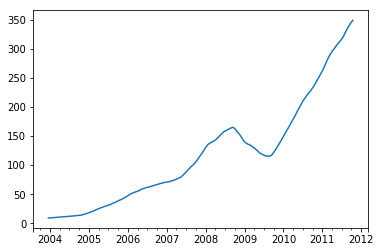

In [316]:
close_px.AAPL.rolling(250).mean().plot()
#rolling运算符，类似于resample和groupby
#作用于TimeSeries等类型
#默认

In [317]:
appl_std250=close_px.AAPL.rolling(250,min_periods=10).std()

In [318]:
appl_std250
#前边的缺失值是由于还不到最小周期
#类似于“逐日增长”需要从第二天才能计算

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
2003-01-09          NaN
2003-01-10          NaN
2003-01-13          NaN
2003-01-14          NaN
2003-01-15     0.077496
2003-01-16     0.074760
2003-01-17     0.112368
2003-01-20     0.132011
2003-01-21     0.149286
2003-01-22     0.169008
2003-01-23     0.168760
2003-01-24     0.184135
2003-01-27     0.182546
2003-01-28     0.178117
2003-01-29     0.181870
2003-01-30     0.178049
2003-01-31     0.174123
2003-02-03     0.171381
2003-02-04     0.168142
2003-02-05     0.164639
2003-02-06     0.161346
2003-02-07     0.161412
2003-02-10     0.158676
2003-02-11     0.156074
2003-02-12     0.153436
                ...    
2011-09-05    25.320023
2011-09-06    25.218932
2011-09-07    25.174057
2011-09-08    25.134226
2011-09-09    25.071408
2011-09-12    25.010059
2011-09-13    24.939448
2011-09-14    24.901731
2011-09-15    24.854159
2011-09-16    24.854202
2011-09-19    24

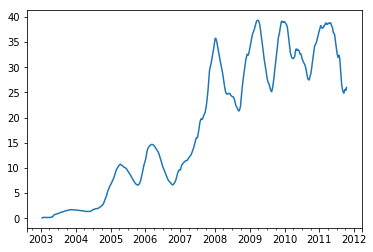

In [319]:
appl_std250.plot()


In [320]:
expending_mean=appl_std250.expanding().mean

In [321]:
expending_mean

<bound method Expanding.mean of Expanding [min_periods=1,center=False,axis=0]>

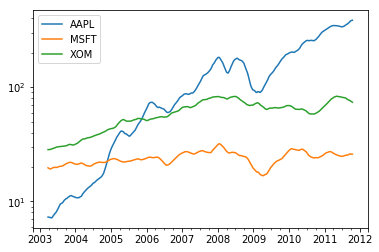

In [322]:
close_px.rolling(60).mean().plot(logy=True)
#对df调用rolling_mean一类的方法，会对所有列应用该函数

In [323]:
close_px.rolling(60).mean()

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN
2003-01-08,NaN,NaN,NaN
2003-01-09,NaN,NaN,NaN
2003-01-10,NaN,NaN,NaN
2003-01-13,NaN,NaN,NaN
2003-01-14,NaN,NaN,NaN
2003-01-15,NaN,NaN,NaN


In [324]:
close_px.rolling('20D').mean()
#接受一个时间长度，用来计算该长度的滚动均值（或其他类似的值）
#这种情况不会出现缺失值

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


### 指数加权函数

In [325]:
aapl_px=close_px.AAPL['2006':'2007']

In [326]:
ma60=aapl_px.rolling(30,min_periods=20).mean()

In [327]:
ewma60=aapl_px.ewm(span=30).mean()
#ewm运算符

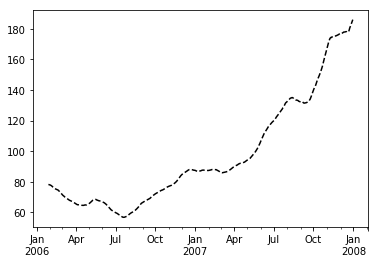

In [328]:
ma60.plot(style='k--',label='Simple MA')

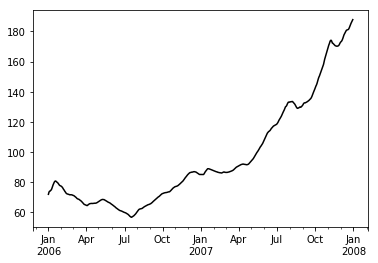

In [329]:
ewma60.plot(style='k-',label='EW MA')

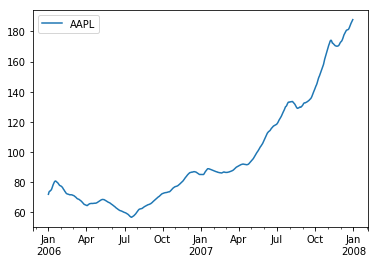

In [330]:
ewma60.plot().legend()
#为什么画了两个图？和书上不一样。

### 二元移动窗口函数

In [331]:
spx_px=close_px_all['SPX']

In [332]:
spx_rets=spx_px.pct_change()

In [333]:
spx_rets

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
2003-01-09    0.019386
2003-01-10    0.000000
2003-01-13   -0.001412
2003-01-14    0.005830
2003-01-15   -0.014426
2003-01-16   -0.003942
2003-01-17   -0.014017
2003-01-21   -0.015702
2003-01-22   -0.010432
2003-01-23    0.010224
2003-01-24   -0.029233
2003-01-27   -0.016160
2003-01-28    0.013050
2003-01-29    0.006779
2003-01-30   -0.022849
2003-01-31    0.013130
2003-02-03    0.005399
2003-02-04   -0.014088
2003-02-05   -0.005435
2003-02-06   -0.006449
2003-02-07   -0.010094
2003-02-10    0.007569
2003-02-11   -0.008098
2003-02-12   -0.012687
2003-02-13   -0.001600
                ...   
2011-09-02   -0.025282
2011-09-06   -0.007436
2011-09-07    0.028646
2011-09-08   -0.010612
2011-09-09   -0.026705
2011-09-12    0.006966
2011-09-13    0.009120
2011-09-14    0.013480
2011-09-15    0.017187
2011-09-16    0.005707
2011-09-19   -0.009803
2011-09-20   -0.001661
2011-09-21 

In [334]:
returns=close_px.pct_change()

In [336]:
corr=returns.AAPL.rolling(125,min_periods=100).corr(spx_rets)
#使用rolling计算苹果股票的百分比变化与SPX百分比变化，在125天的窗口内的相关系数变化情况？

In [337]:
corr

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16         NaN
2003-01-17         NaN
2003-01-20         NaN
2003-01-21         NaN
2003-01-22         NaN
2003-01-23         NaN
2003-01-24         NaN
2003-01-27         NaN
2003-01-28         NaN
2003-01-29         NaN
2003-01-30         NaN
2003-01-31         NaN
2003-02-03         NaN
2003-02-04         NaN
2003-02-05         NaN
2003-02-06         NaN
2003-02-07         NaN
2003-02-10         NaN
2003-02-11         NaN
2003-02-12         NaN
                ...   
2011-09-05    0.752357
2011-09-06    0.745761
2011-09-07    0.741550
2011-09-08    0.738944
2011-09-09    0.746317
2011-09-12    0.743924
2011-09-13    0.745615
2011-09-14    0.748272
2011-09-15    0.747067
2011-09-16    0.748199
2011-09-19    0.731196
2011-09-20    0.731751
2011-09-21 

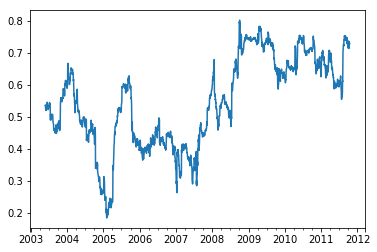

In [338]:
corr.plot()

In [340]:
corr=returns.rolling(125,min_periods=100).corr(spx_rets)
#将rolling方法传递给returns的每一列，计算每一列相对于标准普尔指数的相关系数

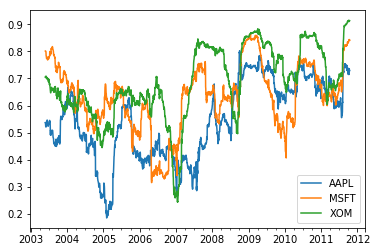

In [341]:
corr.plot()

### 用户定义的移动窗口函数

In [342]:
from scipy.stats import percentileofscore

In [343]:
score_at_2percent=lambda x:percentileofscore(x,0.02)

In [345]:
result=returns.AAPL.rolling(250).apply(score_at_2percent)
#对rolling的结果使用apply方法传入自定义的移动窗口函数，要求该自定义函数是个聚集函数

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


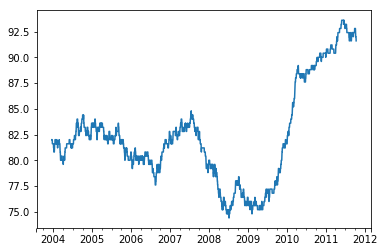

In [346]:
result.plot()